In [1]:
# Pyber - Week 5 Assignment by Verna Orsatti June 18, 2018
# Updated with new data files on June 12

# Pyber Ride Sharing Trends

In the following Bubble Chart for year 2018, data values of dated, individual rides are summarized in the bubble, representing the number of rides per city and it's average fare.  Each bubble is further represented by a size relative to the number of drivers per city. 

The chart effectively shows the trend that rides in rural areas are higher priced. It is possible that the higher average price of rides in rural areas is affected by greater distances traveled to other locations. Prices could be higher due to the lesser number of drivers as well as seen in traditional supply and demand curves.

As population density increases, with urban being the most highly denes, individual average ride costs goes down. Reasons for lower ride cost are most likely explained by more numbers of short distance rides, and more drivers available, leading to competition.  What these charts don't show is the actual relationship between city and population to see how the numbers of drivers are relation to population that would give insight into trends towards driving privately or through Pyber rides.
 
With the values for suburban locations are somewhere in-between rural and urban.  It is safe to conlude that:
1) Rides prices are going to range from higher to lower prices as population density increases as shown in ride type. 
2) The number of rides increases with density and,
3) The number of drivers increases with density.

As the provided pie charts show, the proportions of of rides, drivers, and fares by city type are fairly consistant across the three charts, further showing the direct relation of price being the element that is affected by density of where rides occur.
There is a slight reduction in fares in rural areas that can be likely explained be the necessity of having personal owned transportation due to distances and driver availability.

In [2]:
## Option 1: Pyber

# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use the Matplotlib and Seaborn libraries.

# * You must include a written description of three observable trends based on the data.

# * You must include an exported markdown version of your Notebook called
#         `README.md` in your GitHub repository.
# * See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.

In [3]:
#Utilities
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read and Merge Data
city_data = pd.read_csv('city_data.csv')
# city_data.head(5)
# city_data.shape # > (120,3)

In [5]:
ride_data = pd.read_csv('ride_data.csv')
# ride_data.shape  # > (2375, 4)

In [6]:
# Merged csv files into 1 dataframe
merge_df = pd.merge(ride_data, city_data, on="city")

print(merge_df)

                    city                 date   fare        ride_id  \
0     Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   
5     Lake Jonathanshire  2018-04-06 11:30:32  16.84  6164453571846   
6     Lake Jonathanshire  2018-03-21 00:18:34  37.95  8353656732934   
7     Lake Jonathanshire  2018-01-28 00:07:00   5.67  9756573174778   
8     Lake Jonathanshire  2018-01-24 12:24:22  34.65  3319117904437   
9     Lake Jonathanshire  2018-03-24 16:27:49  14.94  1670908453476   
10    Lake Jonathanshire  2018-04-11 22:10:30  12.81  5999870428814   
11    Lake Jonathanshire  2018-01-23 21:43:16  21.11  7711472105447   
12    Lake Jonathanshire  2018-01-29 00:19:07  41.05  6649692036139   
13    

# Bubble Plot of Ride Sharing Data

In [7]:
# Prep for Bubble Chart

In [8]:
# Total Number of Rides All Cities
num_rides_city = merge_df.groupby('city').ride_id.count().tolist() #
# num_rides_city
# sum(num_rides_city) # = 2375

In [9]:
# 3 City Types (Urban, Surburban, Rural) for Bubble Chart

In [10]:
# Ride type = Rural data
rural_rides_city = merge_df.query('type == "Rural"')
# Number of Rides per City
num_rides_city_rural = rural_rides_city.groupby('city').ride_id.count().tolist()
# Average Fare ($) in Rural 
ave_fare_rural = rural_rides_city.groupby('city').fare.mean().tolist()
# Number of Drivers per City 
size_rural = rural_rides_city.groupby('city').driver_count.mean().tolist()

In [11]:
# Ride type = Surburban data
suburban_rides_city = merge_df.query('type == "Suburban"')
# Number of Rides per City
num_rides_city_suburban = suburban_rides_city.groupby('city').ride_id.count().tolist()
# Average Fare ($) 
ave_fare_suburban = suburban_rides_city.groupby('city').fare.mean().tolist()
# Number of Drivers per City 
size_suburban = suburban_rides_city.groupby('city').driver_count.mean().tolist()

In [12]:
# Ride type = Urban data
urban_rides_city = merge_df.query('type == "Urban"')
# Number of Rides per City
num_rides_city_urban = urban_rides_city.groupby('city').ride_id.count().tolist()
# Average Fare ($) 
ave_fare_urban = urban_rides_city.groupby('city').fare.mean().tolist()
ave_fare_suburban = suburban_rides_city.groupby('city').fare.mean().tolist()
# Number of Drivers per City 
size_urban = urban_rides_city.groupby('city').driver_count.mean().tolist()

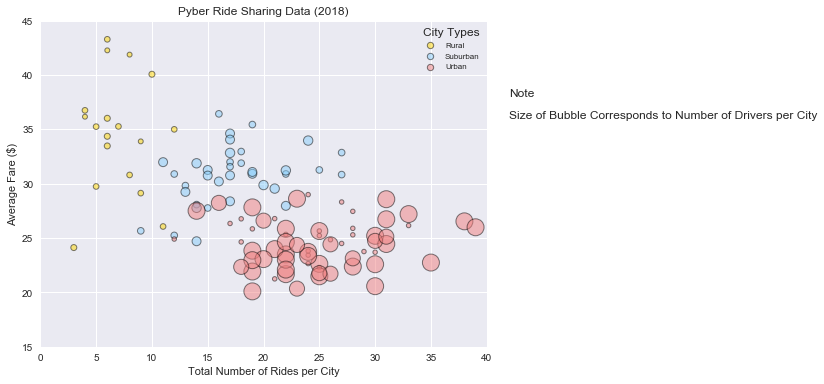

In [13]:
#Prepare for Bubble Chart
sns.set()

plt.figure(figsize=(8,6))
plt.xlim(0,40)
plt.ylim(15,45)

plt.scatter(num_rides_city_rural, ave_fare_rural, s=rural_rides_city['driver_count']*4, c="gold", edgecolors="black", alpha=.5, linewidth=1, label="Rural")
plt.scatter(num_rides_city_suburban,ave_fare_suburban, s=suburban_rides_city['driver_count']*4, c="lightskyblue", edgecolors="black",alpha=.5, linewidth=1, label="Suburban")
plt.scatter(num_rides_city_urban,ave_fare_urban, s=urban_rides_city['driver_count']*4, c="lightcoral", edgecolors="black",alpha=.5, linewidth=1, label="Urban")

plt.text(42, 38, "Note")
plt.text(42 ,36, "Size of Bubble Corresponds to Number of Drivers per City")
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')

legen = plt.legend(title="City Types", fontsize=8, loc='upper right')
legen.legendHandles[0]._sizes = [40]
legen.legendHandles[1]._sizes = [40] 
legen.legendHandles[2]._sizes = [40]

plt.show()

# Total Fares by City Type

In [14]:
# Total Fares by City TYPE data to list
data_tfct = merge_df.groupby(['type']).sum()["fare"].tolist()
# data_tfct # Returns [4327.93, 19356.329999999994, 39854.38]

In [15]:
# Pie Chart Figure varables
values = data_tfct
title = "% Total Fares by City Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold','lightblue','lightcoral']
explodes = (0,0,.14)
autopct = "%1.1f%%"
startangle = 115
shadow = "True"

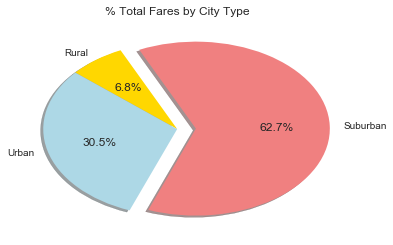

In [16]:
# Show figure
plt.title(title)
plt.pie(values, explode=explodes,startangle=startangle, autopct=autopct, labels=labels,colors=colors,shadow=shadow)
plt.show()

# Total Rides by City Type

In [17]:
# Total RIDES by CITY TYPE data to list
data_trct = merge_df.groupby(['type']).count()["ride_id"].tolist()
# data_trct # Returns [125, 625, 1625]

In [18]:
# Pie Chart Figure varables
values = data_trct
title = "% Total Rides by Per City Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold','lightblue','lightcoral']
explodes = (0,0,.14)
autopct = "%1.1f%%"
startangle = 128
shadow = "True"

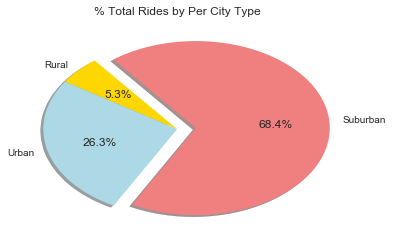

In [19]:
# Show figure
plt.title(title)
plt.pie(values, explode=explodes,startangle=startangle, autopct=autopct, labels=labels,colors=colors,shadow=shadow)
plt.show()

# Total Drivers by City Type

In [20]:
# Total DRIVERS by CITY TYPE data to list
data_tdct = merge_df.groupby(['type']).mean()["driver_count"].tolist()
# data_tdct # Returns [4.296, 13.712, 36.67815384615385]

In [21]:
# Pie Chart Figure varables
values = data_tdct
title = "% Total Drivers by City Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold','lightblue','lightcoral']
explodes = (0,0,.14) 
autopct = "%1.1f%%"
startangle = 123
shadow = "True"

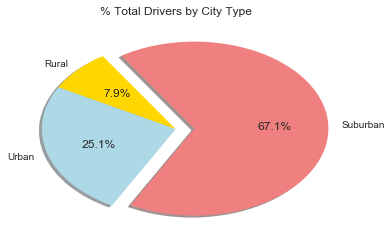

In [22]:
# Show figure
plt.title(title)
plt.pie(values, explode=explodes,startangle=startangle, autopct=autopct, labels=labels,colors=colors,shadow=shadow)
plt.show()

In [23]:
# "It's all a point of view.  
#     If the view isn't what you like, 
#     step outside the box you're in, and see the bigger picture. 
#     Repeat until the view makes sense and you're at peace and have joy.  
#     Then you'll know that you are in the right place of mind for this place in time."
#     ~ Verna Oratti June 18, 2018
